<a href="https://colab.research.google.com/github/lakatosgabor/OpenCV_gyakorlat/blob/main/1_konzultacio_2_resz_hisztogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. OpenCV importálás
A kódolás megkezdése előtt érdemes az Open CV verzióját lekérni.
Egyrészt meg kell vizsgálnunk, hogy létezik-e a futtatókörnyezetben, másrészt az egyes függvényhívások és a függvények paraméterezései verziónként eltérőek lehetnek.

Ha nem áll rendelkezésre, hozz létre egy kód blokkot a bal felső sarokban található " + Kód " gommbal, majd futtasd a követező parancsot:

```
!pip install opencv-python-headless
```


In [3]:
import cv2 as cv
from matplotlib import pyplot as plt
#from google.colab.patches import cv2_imshow
import numpy as np

# OpenCV verziójának lekérdezése
versionOfOpenCV = cv.__version__
print("OpenCV verzió: " + versionOfOpenCV)

OpenCV verzió: 4.11.0


# 2. Drive csatlakoztatása

Futtasd az alábbi kódot a Google Drive tárhely csatlkoztatásához.
Add meg a Google által kért engedélyeket.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3. Kép betöltése Google Drive-ból
A Drive-ba feltölött fájlokat a "/content/drive/MyDrive/" útvonal alatt érhetjük el. Az útvonal megtekinthető a bal oldali File Expoler-ben. Egy adott fájlt javasolt először kikeresni az Expolerben, majd jobb gombbal kattintva másoljuk ki a fájl elérési útvonalát. Ezáltal elkerülhetjük az elgépeléseket.

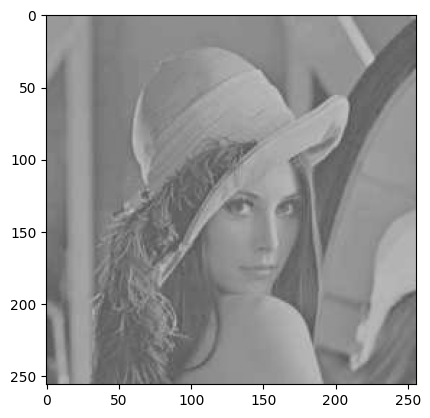

In [17]:
# Beolvassa a képet a megadott elérési útról, és szürkeárnyalatos képként tárolja el a src változóban.
src = cv.imread("lena.jpg", cv.IMREAD_GRAYSCALE)
plt.imshow(src, 'gray', vmin=0, vmax=255)

# 4. Hisztogram kirajzolása
A hisztogram egy olyan diagram, amely megmutatja a képen található különböző szürkeárnyalati szintek gyakoriságát.


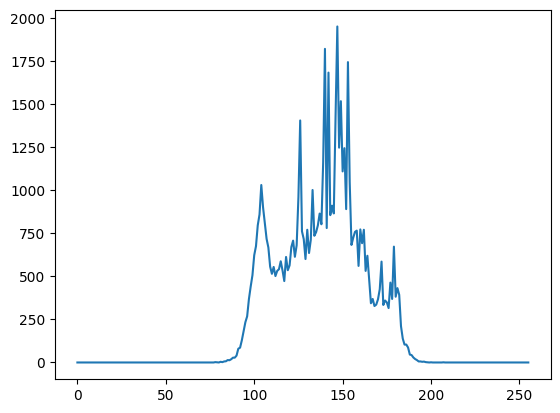

In [18]:
# Kiszámoljuk a bemeneti kép hisztogramját és tároljuk el a hist_src változóban.
hist_src = cv.calcHist([src],[0],None,[256],[0,256])
plt.plot(hist_src)

# 5. Hisztogram kiegyenlítés
A hisztogram kiegyenlítéssel a kép láthatóságát lehet javítani. Itt kétféle módszert nézünk meg.


Irodalom:
- [Hisztogram](https://docs.opencv.org/4.8.0/d4/d1b/tutorial_histogram_equalization.html

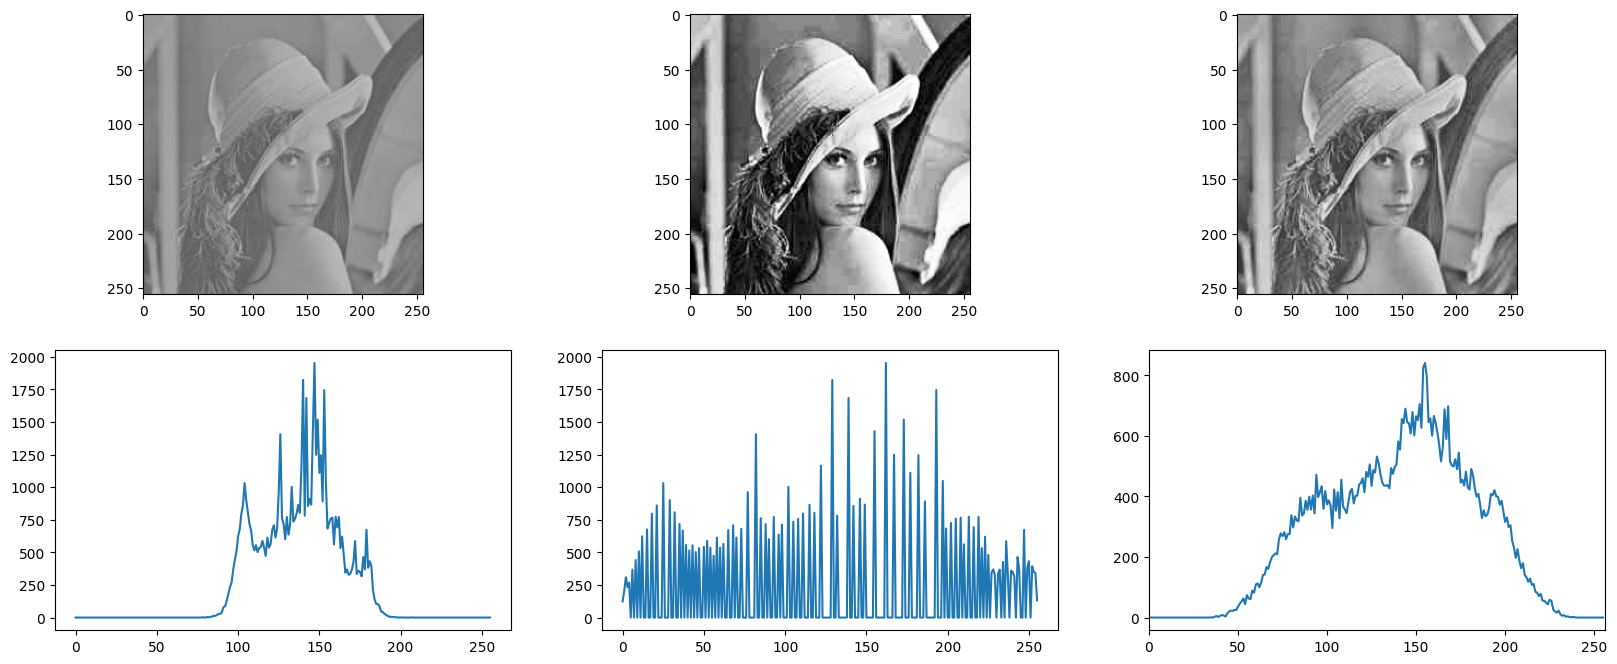

In [21]:


# Elvégez egy kontraszt-kiegyenlítést a src képen, és az eredményt a dst változóban tárolja el.
dst = cv.equalizeHist(src)

# Kiszámolja a kontraszt-kiegyenlített kép hisztogramját, és tárolja el a hist_dst változóban.
hist_dst = cv.calcHist([dst],[0],None,[256],[0,256])

# Contrast Limited Adaptive Histogram Equalization
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# A CLAHE algoritmus alkalmazása a src képre, és az eredményt a dst2 változóban tárolja el. Ez a lépés egy további kontrasztjavítást hajt végre a képen.
dst2 = clahe.apply(src)

# Kiszámolja a CLAHE után kapott kép hisztogramját, és tárolja el a hist_dst2 változóban.
hist_dst2 = cv.calcHist([dst2],[0],None,[256],[0,256])

# Elrendezés létrehozás: 2 sor, 3 oszlop
f,axs=plt.subplots(2,3,figsize=(20,8))

# Az első sorban a következők jelennek meg: eredeti kép, kontraszt-kiegyenlített kép (dst), és CLAHE algoritmus után kapott kép (dst2).
plt.subplot(231), plt.imshow(src, 'gray', vmin=0, vmax=255)
plt.subplot(232), plt.imshow(dst, 'gray', vmin=0, vmax=255)
plt.subplot(233), plt.imshow(dst2, 'gray', vmin=0, vmax=255)

# A második sorban a hisztogramok jelennek meg: az eredeti kép hisztogramja (hist_src), a kontraszt-kiegyenlített kép hisztogramja (hist_dst) és a CLAHE után kapott kép hisztogramja (hist_dst2).
plt.subplot(234), plt.plot(hist_src)
plt.subplot(235), plt.plot(hist_dst)
plt.subplot(236), plt.plot(hist_dst2)
plt.xlim([0,256])
plt.show()

# 5. Két kép összehasonítása, különbség méréssel
**Mean Square Error (MSE):** A MSE az eredeti kép és a kontraszt-kiegyenlített kép közötti különbséget méri a pixelértékek négyzetes eltéréseinek átlagaként. Minél kisebb az MSE értéke, annál hasonlóbbak a két kép egymáshoz. A konkrét érték, amit megadott (2694.5781860351562), viszonylag magasnak tekinthető, ami azt jelzi, hogy az eredeti és a kontraszt-kiegyenlített kép közötti eltérések elég nagyok.

**Structural Similarity Index Measure (SSIM):** Az SSIM egy olyan metrika, amely a képek strukturális hasonlóságát méri, figyelembe véve a luminanciát, a kontrasztot és a szerkezetet. Az SSIM értéke 0 és 1 között változhat, ahol 1 a legjobb hasonlóságot jelenti az eredeti képhez képest. A konkrét érték (0.6183235608593584) közepesnek tekinthető, ami azt jelzi, hogy a kontraszt-kiegyenlített képben még mindig vannak eltérések az eredeti képhez képest, de nem feltétlenül rossz minőségű.

**Peak Signal to Noise Ratio (PSNR):** A PSNR egy másik képminőséget mérő metrika, és azt mutatja meg, hogy az eredeti képhez képest milyen mértékű zaj jelenik meg a feldolgozott képen. Minél magasabb a PSNR érték, annál kevesebb zaj van jelen a képen, és jobb a képminőség. A konkrét érték (13.825895712394496) alacsony lehet, ami azt jelentheti, hogy a kontraszt-kiegyenlített képben jelentős zaj jelenik meg a feldolgozás során.

Az eredményekből könnyű belátni, hogy egy adott képhez hozáadott kis métékű zaj, nagy eltérést eredményezhet.

Irodalom:
*   [MSE, SSM](https://pyimagesearch.com/2014/09/15/python-compare-two-images/)
*   [PSNR](https://dsp.stackexchange.com/questions/38065/peak-signal-to-noise-ratio-psnr-in-python-for-an-image)




In [ ]:
from skimage.metrics import structural_similarity as stsm

In [ ]:
'''
Bemeneti képeket, imageA és imageB, várja paraméterként. Ezeknek a képeknek ugyanolyan méretűnek kell lenniük,
mivel a különbségüket számoljuk.
Mindkét képet először float típusúvá alakítja át, hogy a különbségeket pontosan lehessen kiszámolni.
Az eltérések négyzetét számolja ki a két kép között minden pixelen, majd ezeket összegezi. Az összegzett négyzetes eltérést
elosztja a képek összes pixelének számával. Visszatér az MSE értékkel, amelyet a hiba mértékének fejez ki.
Minél kisebb az MSE, annál hasonlóbbak a két kép egymáshoz: az alacsonyabb érték azt jelzi, hogy a képek kevésbé különböznek egymástól.
'''

def meanSquareError(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

<ipython-input-7-b682136bb2d8>:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221), plt.imshow(src, 'gray')
<ipython-input-7-b682136bb2d8>:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(222), plt.imshow(src2, 'gray')


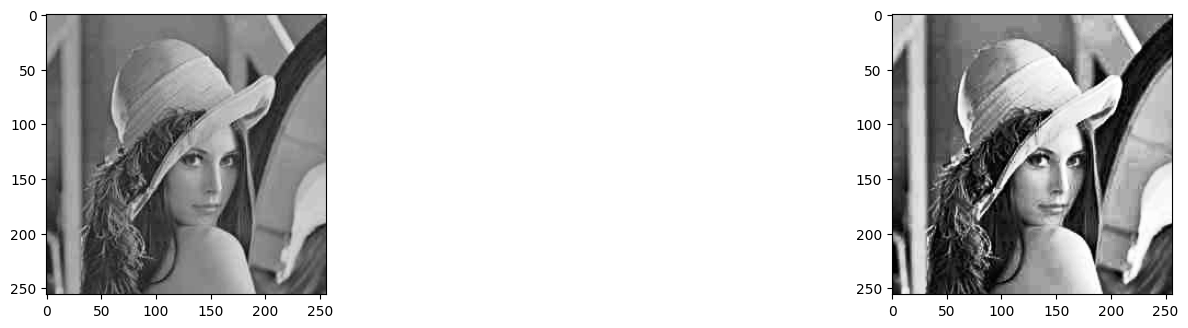

Mean Square Error:  2694.5781860351562
Peak Signal to Noise Ratio:  13.825895712394496
Structural Similarity Index Measure:  0.6183235608593584


In [ ]:
# Kontraszt-kiegyenlítést az src képen és az eredményt az src2 változóban tároljuk.
src2 = cv.equalizeHist(src)

# MSE érték meghatározzása az eredeti és a kontraszt-kiegyenlített kép között.
mse = meanSquareError(src, src2)

# Zajszint meghatároza az eredeti és a kontraszt-kiegyenlített kép között (Peak Signal to Noise Ratio).
psnr = cv.PSNR(src, src2)

# A strukturális hasonlóság meghatározása az eredeti és a kontraszt-kiegyenlített kép között (Structural Similarity Index Measure).
ssim = stsm(src, src2)

# Elrendezés létrehozása, 2 oszlop, 1 sor.
f,axs=plt.subplots(1,2,figsize=(20,8))

# Az ábrán belül két részterületet határoz meg, majd az im1 és im2 képeket jeleníti meg szürkeárnyalatosként az ábrán.
# Az egyik részterület az eredeti képet mutatja, a másik pedig a kontraszt-kiegyenlített képet.
plt.subplot(221), plt.imshow(src, 'gray')
plt.subplot(222), plt.imshow(src2, 'gray')
plt.show()

# Eredmények kiírása.
print("Mean Square Error: ", mse)
print("Peak Signal to Noise Ratio: ", psnr)
print("Structural Similarity Index Measure: ", ssim)